# Bandgap property prediction using Random Forest and Decision Tree

## Using RDKIT

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem,Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"export.csv")
df

,smiles,property,value
0,[*]CC([*])C,Eat,-5.14
1,[*]CC([*])F,Eat,-5.18
2,[*]CC([*])(F)F,Eat,-5.21
3,[*]C(F)C([*])(F)F,Eat,-5.11
4,[*]CCC(F)(F)C([*])(F)F,Eat,-5.21
...,...,...,...
6260,[*]C(F)(F)C(F)(F)C(S1)=CC=C1C(S2)=CC=C2[*],eps,4.36
6261,[*]C(F)(F)C(F)(F)C(=O)O[*],eps,3.31
6262,[*]C(F)(F)C(=O)C(F)(F)C(S1)=CC=C1[*],eps,4.05
6263,[*]C(F)(F)C(=O)C(F)(F)C(C=C1)=CC=C1[*],eps,3.57


In [3]:
def canonical(smiles):
    
    a,b = [],[]
    
    for i in smiles:
        a.append(Chem.MolFromSmiles(i))
        
    for j in a:
        b.append(Chem.MolToSmiles(j))
                 
    return b

##### Chem.MolFromSmiles and Chem.MolToSmiles

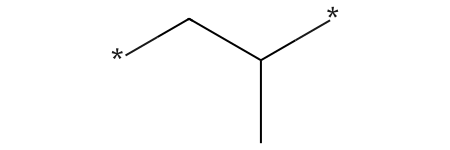

In [4]:
test = "[*]CC([*])C"
t = Chem.MolFromSmiles(test)
t

In [5]:
Chem.MolToSmiles(t)

'*CC(*)C'

In [6]:
Canon= canonical(df.smiles)
df['smiles'] = Canon
df

,smiles,property,value
0,*CC(*)C,Eat,-5.14
1,*CC(*)F,Eat,-5.18
2,*CC(*)(F)F,Eat,-5.21
3,*C(F)C(*)(F)F,Eat,-5.11
4,*CCC(F)(F)C(*)(F)F,Eat,-5.21
...,...,...,...
6260,*c1ccc(-c2ccc(C(F)(F)C(*)(F)F)s2)s1,eps,4.36
6261,*OC(=O)C(F)(F)C(*)(F)F,eps,3.31
6262,*c1ccc(C(F)(F)C(=O)C(*)(F)F)s1,eps,4.05
6263,*c1ccc(C(F)(F)C(=O)C(*)(F)F)cc1,eps,3.57


In [7]:
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles] 
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] 
                                    for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    
    Mol_descriptors =[]
    for mol in mols:
        # add hydrogens to molecules
        mol=Chem.AddHs(mol)
        # Calculate all 200 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names 

# Function call

Mol_descriptors,desc_names = RDkit_descriptors(df['smiles'])

In [8]:
df_200 = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_200

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,7.465278,-2.404514,7.465278,0.724792,0.414720,42.081,36.033,42.046950,18,0,...,0,0,0,0,0,0,0,0,0,0
1,12.361111,-2.118056,12.361111,0.666667,0.409424,46.044,43.020,46.021878,18,0,...,0,0,0,0,0,0,0,0,0,0
2,12.027778,-2.868056,12.027778,0.854167,0.427904,64.034,62.018,64.012457,24,0,...,0,0,0,0,0,0,0,0,0,0
3,11.986111,-3.201389,11.986111,1.187500,0.441842,82.024,81.016,82.003035,30,0,...,0,0,0,0,0,0,0,0,0,0
4,12.941875,-4.883681,12.941875,1.453681,0.510440,128.068,124.036,128.024913,48,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,13.869230,-4.441628,13.869230,0.020181,0.737828,264.268,260.236,263.969055,84,0,...,0,0,0,0,0,0,0,2,0,0
6261,12.202454,-4.574653,12.202454,1.048588,0.534777,144.023,144.023,143.983442,52,0,...,0,0,0,0,0,0,0,0,0,0
6262,13.544977,-4.337917,13.544977,0.343579,0.694102,210.151,208.135,209.976249,70,0,...,0,0,0,0,0,0,0,1,0,0
6263,13.883065,-4.723495,13.883065,0.052901,0.684136,204.122,200.090,204.019828,74,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
#----------------------------------------------------
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sn

In [96]:
dfeps = df.iloc[824:4203,:]

In [97]:
y1 = dfeps.value
x1= df_200.iloc[824:4203,:20]

In [98]:
x1

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI
824,7.699653,-2.904583,7.699653,0.908125,0.451401,56.108,48.044,56.062600,24,0,NaN,NaN,NaN,NaN,3.500000,4.500000,4.750000,NaN,NaN,NaN
825,7.849653,-3.217083,7.849653,1.048856,0.476641,70.135,60.055,70.078250,30,0,NaN,NaN,NaN,NaN,3.000000,4.000000,4.600000,NaN,NaN,NaN
826,7.999653,-3.529583,7.999653,1.189588,0.492023,84.162,72.066,84.093900,36,0,NaN,NaN,NaN,NaN,2.500000,3.333333,3.833333,NaN,NaN,NaN
827,8.066250,-3.015625,8.066250,1.253750,0.454072,82.146,72.066,82.078250,34,0,NaN,NaN,NaN,NaN,2.500000,3.500000,3.833333,NaN,NaN,NaN
828,8.515455,-4.438931,8.515455,1.474958,0.557384,152.281,132.121,152.156501,64,0,NaN,NaN,NaN,NaN,1.818182,2.636364,3.363636,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4198,8.615587,-5.382614,8.615587,1.939515,0.387132,214.397,184.157,214.239802,90,0,NaN,NaN,NaN,NaN,1.000000,1.733333,2.400000,NaN,NaN,NaN
4199,8.739772,-5.811043,8.739772,2.025479,0.307304,284.532,244.212,284.318052,120,0,NaN,NaN,NaN,NaN,0.750000,1.250000,1.750000,NaN,NaN,NaN
4200,8.874263,-6.152897,8.874263,2.071276,0.123176,396.748,340.300,396.443253,168,0,NaN,NaN,NaN,NaN,0.535714,0.892857,1.250000,NaN,NaN,NaN
4201,8.940671,-6.140285,8.940671,0.537558,0.718954,246.502,224.326,246.126004,86,0,NaN,NaN,NaN,NaN,1.250000,1.875000,2.437500,NaN,NaN,NaN


In [99]:
x1 = x1.dropna(axis=1)

### Random Forest

In [100]:
from sklearn.ensemble import RandomForestRegressor
  
regressor1 = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.33, random_state=42)

regressor1.fit(X_train, y_train) 


predictions1 = regressor1.predict(X_test)
predictions_train = regressor1.predict(X_train)


result1 = X_test
result1['value'] = y_test
result1['prediction'] = predictions1.tolist()
result1.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,value,prediction
1226,11.835155,-3.851372,11.835155,1.090059,0.373532,204.178,192.082,204.063388,80,0,1.214286,2.000000,2.714286,5.9381,5.825521
1145,9.475821,-1.027047,9.475821,0.178436,0.198998,576.659,552.467,576.195011,210,0,0.422222,0.866667,1.466667,2.9354,3.262195
1281,12.105289,-3.879526,12.105289,0.546530,0.560008,294.398,276.254,294.070799,104,0,1.222222,1.833333,2.388889,5.2808,4.587247
1703,12.791843,-4.373676,12.791843,0.028387,0.667596,247.298,230.162,247.132077,96,0,1.388889,2.111111,2.833333,4.7860,4.104781
2360,8.293990,-2.787024,8.293990,0.232227,0.782619,260.292,248.196,260.083730,96,0,1.000000,1.600000,2.200000,4.0246,4.063853


In [101]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
R2 =r2_score(y_test,predictions1)
print('R^2 of Crystallisation tendency:', R2)

rmse = np.sqrt(mean_squared_error(y_test, predictions1))
print('RMSE of crystallisation Tendency:', rmse)

R^2 of Crystallisation tendency: 0.7130208962289674
RMSE of crystallisation Tendency: 0.8512159431569444


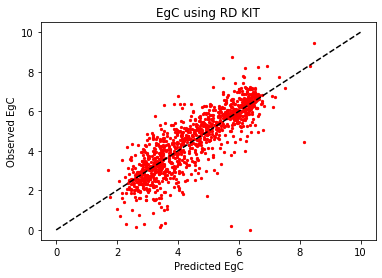

In [103]:
plt.scatter(predictions1,y_test,c="r",s=5)
plt.plot([0,10], [0,10] ,"k--")
plt.xlabel('Predicted EgC')
plt.ylabel('Observed EgC')
plt.title("EgC using RD KIT");

### Decision Tree

In [104]:
from sklearn.tree import DecisionTreeRegressor
  
regressor1 =DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.33, random_state=42)

regressor1.fit(X_train, y_train) 


predictions1 = regressor1.predict(X_test)
predictions_train = regressor1.predict(X_train)


result1 = X_test
result1['value'] = y_test
result1['prediction'] = predictions1.tolist()
result1.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,value,prediction
1226,11.835155,-3.851372,11.835155,1.090059,0.373532,204.178,192.082,204.063388,80,0,1.214286,2.000000,2.714286,5.9381,4.4209
1145,9.475821,-1.027047,9.475821,0.178436,0.198998,576.659,552.467,576.195011,210,0,0.422222,0.866667,1.466667,2.9354,3.3775
1281,12.105289,-3.879526,12.105289,0.546530,0.560008,294.398,276.254,294.070799,104,0,1.222222,1.833333,2.388889,5.2808,4.0366
1703,12.791843,-4.373676,12.791843,0.028387,0.667596,247.298,230.162,247.132077,96,0,1.388889,2.111111,2.833333,4.7860,4.8391
2360,8.293990,-2.787024,8.293990,0.232227,0.782619,260.292,248.196,260.083730,96,0,1.000000,1.600000,2.200000,4.0246,4.1962


In [105]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, predictions1))
print('RMSE of crystallisation Tendency:', rmse)

RMSE of crystallisation Tendency: 1.1767049812710189


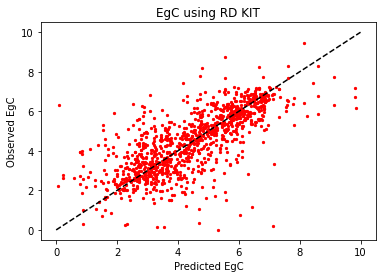

In [107]:
plt.scatter(predictions1,y_test,c="r",s=5)
plt.plot([0,10], [0,10] ,"k--")
plt.xlabel('Predicted EgC')
plt.ylabel('Observed EgC')
plt.title("EgC using RD KIT");

# Ablation studies.

#### Random Forest

In [108]:

from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

n_estimators = [50,300, 400] # number of trees in the random forest
# max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 150, num = 3)] # maximum number of levels allowed in each decision tree
# min_samples_split = [2, 6, 10] # minimum sample number to split a node
# min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
# bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators, 
#                'max_features': max_features,

'max_depth': max_depth}

# 'min_samples_split': min_samples_split,

# 'min_samples_leaf': min_samples_leaf,

# 'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 200, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(x1, y1)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 80, 150],
                                        'n_estimators': [50, 300, 400]},
                   random_state=42, verbose=2)

In [109]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [50, 300, 400], 'max_depth': [10, 80, 150]} 

Best Parameters:  {'n_estimators': 300, 'max_depth': 80}  



In [110]:
regressor2 = RandomForestRegressor(n_estimators= 300, max_depth= 80)

X_train1, X_test1, y_train1, y_test1 = train_test_split(x1,y1,test_size=0.33, random_state=42)
  
regressor2.fit(X_train1, y_train1) 


predictions2 = regressor2.predict(X_test1)

Rmse = np.sqrt(mean_squared_error(y_test1, predictions2))
print('MSE of Crystallisation Tendency after tuning for random forest:', Rmse)

MSE of Crystallisation Tendency after tuning for random forest: 0.8424608715057506


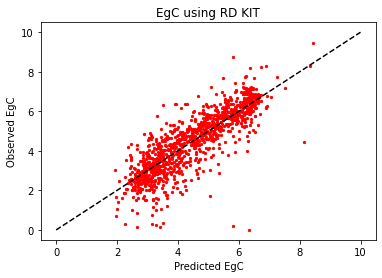

In [111]:
plt.scatter(predictions2,y_test1,c="r",s=5)
plt.plot([0,10], [0,10] ,"k--")
plt.xlabel('Predicted EgC')
plt.ylabel('Observed EgC')
plt.title("EgC using RD KIT");

### Decision Tree

In [112]:
dt = DecisionTreeRegressor()

min_samples_split = [3,5, 8] # number of trees in the random forest
# max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 150, num = 3)] # maximum number of levels allowed in each decision tree
# min_samples_split = [2, 6, 10] # minimum sample number to split a node
# min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
# bootstrap = [True, False] # method used to sample data points

random_grid = {'min_samples_split': min_samples_split, 
#                'max_features': max_features,

'max_depth': max_depth}

# 'min_samples_split': min_samples_split,

# 'min_samples_leaf': min_samples_leaf,

# 'bootstrap': bootstrap}

dt_random = RandomizedSearchCV(estimator = dt,param_distributions = random_grid,
               n_iter = 200, cv = 3, verbose=2, random_state=42, n_jobs = -1)

dt_random.fit(x1, y1)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 80, 150],
                                        'min_samples_split': [3, 5, 8]},
                   random_state=42, verbose=2)

In [113]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', dt_random.best_params_, ' \n')

Random grid:  {'min_samples_split': [3, 5, 8], 'max_depth': [10, 80, 150]} 

Best Parameters:  {'min_samples_split': 8, 'max_depth': 10}  



In [114]:
regressor2 = DecisionTreeRegressor(min_samples_split = 8, max_depth= 10)

X_train1, X_test1, y_train1, y_test1 = train_test_split(x1,y1,test_size=0.33, random_state=42)
  
regressor2.fit(X_train1, y_train1) 


predictions2 = regressor2.predict(X_test1)

Rmse = np.sqrt(mean_squared_error(y_test1, predictions2))
print('MSE of Crystallisation Tendency after tuning for decsion tree:', Rmse)

MSE of Crystallisation Tendency after tuning for decsion tree: 1.0627474171562665


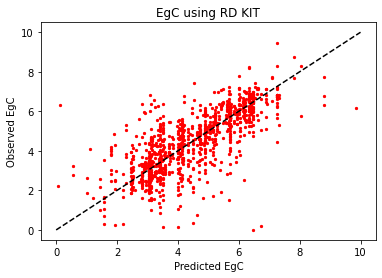

In [116]:
plt.scatter(predictions2,y_test1,c="r",s=5)
plt.plot([0,10], [0,10] ,"k--")
plt.xlabel('Predicted EgC')
plt.ylabel('Observed EgC')
plt.title("EgC using RD KIT");

# Using our algorithm

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
df = pd.read_csv(r"export.csv")
df

,smiles,property,value
0,[*]CC([*])C,Eat,-5.14
1,[*]CC([*])F,Eat,-5.18
2,[*]CC([*])(F)F,Eat,-5.21
3,[*]C(F)C([*])(F)F,Eat,-5.11
4,[*]CCC(F)(F)C([*])(F)F,Eat,-5.21
...,...,...,...
6260,[*]C(F)(F)C(F)(F)C(S1)=CC=C1C(S2)=CC=C2[*],eps,4.36
6261,[*]C(F)(F)C(F)(F)C(=O)O[*],eps,3.31
6262,[*]C(F)(F)C(=O)C(F)(F)C(S1)=CC=C1[*],eps,4.05
6263,[*]C(F)(F)C(=O)C(F)(F)C(C=C1)=CC=C1[*],eps,3.57


In [117]:
list1 = df.iloc[824:4203,0].tolist()
list2 = ["C", "O", "c", "F", "N", "Br", "S"]

In [118]:
def atommass(a):
    mass = {"C": 12, "O": 16, "F": 18, "N": 14, "S": 32, "Br": 80, "c": 12}
    for items, value in mass.items():
        if a == items:
            z = value
            break
        else:
            z = 0
    return z

def atomno(a):
    num = {"C": 6, "O": 8, "F": 9, "N": 7, "S": 16, "Br": 35, "c": 6}
    for items, value in num.items():
        if a == items:
            z = value
            break
        else:
            z = 0
    return z

def valency(a):
    val = {"C": 4, "O": 2, "F": 1, "N": 3, "S": 2, "Br": 1, "c": 4}
    for items, value in val.items():
        if a == items:
            z = value
            break
        else:
            z = 0
    return z

def hydrogen(smile):
    if smile[0] == "=" or smile[2] == "=" :
        H = 1
    elif smile[0] == "=" and smile[2] == "=":
        H = 0
    else:
        H = 2
    return H

def endhydrogen(smile):
    if smile[0] == "=":
        H = 2
    else:
        H = 3
    return H

In [119]:
identifier = []
A=[]
Aupdated =[]
for i in range(len(list1)):
    orderno = []
    B = []
    for j in range(3, len(list1[i])):
        if list1[i][j] in list2:
            mass = atommass(list1[i][j])
            num = atomno(list1[i][j])
            val = valency(list1[i][j])
            if j != 3 and j != (len(list1[i])-1):
                smiles = list1[i][j-1] + list1[i][j] + list1[i][j+1]
                H = hydrogen(smiles)
            else:
                if j == 3:
                    smiles = list1[i][j] + list1[i][j+1]
                else:
                    smiles = list1[i][j-1] + list1[i][j]
                H = endhydrogen(smiles)
            idno = hash((mass, num, val, H))
            B.append(idno)
        if list1[i][j] == "=":
            orderno.append(j)

    upB = B
    for iteration in range(2): 
        update = []
        for k in range(len(upB)-1):
            Q = []
            if k == 0:
                if list1[i][4]== "=":
                    g = 2
                else:
                    g = 1 
                Q = [iteration + 1 , upB[k]] + [g, upB[k+1]]
            elif k != len(B) -1:
                
                Q = [iteration + 1 , upB[k]] + [1, upB[k-1]] + [1, upB[k+1]]
            else:
                Q = [iteration + 1 , upB[k]] + [1, upB[k-1]]  
            update.append(hash(tuple(Q)))
        upB = update
    A.append(B)
    Aupdated.append(upB)

In [120]:
fingerprint=[]
for i in range(len(Aupdated)):         
    fp = np.zeros(1024)
    remainder = []
    for j in range(len(Aupdated[i])):
        remainder.append(Aupdated[i][j] % 1024)
    for x in remainder:
        fp[x] = 1
    fingerprint.append(fp)

In [121]:
dfnew = pd.DataFrame(fingerprint)

In [122]:
dfnew

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
y = df.iloc[824:4203,:].value
x= dfnew
y

824     6.5170
825     6.7336
826     6.7394
827     6.9613
828     6.3703
         ...  
4198    0.2161
4199    0.1032
4200    0.1771
4201    2.2084
4202    7.6997
Name: value, Length: 3379, dtype: float64

### Random Forest

In [124]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(x,  y, test_size=0.33, random_state=42)

regressor1.fit(X_train, y_train) 


predictions1 = regressor1.predict(X_test)
predictions_train = regressor1.predict(X_train)

In [125]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

R2 =r2_score(y_test, predictions1)

print('R^2 of crystallisation tendency:', R2)

mse = np.sqrt(mean_squared_error(y_test, predictions1))
print('RMSE of crystallisation tendency:', mse)

R^2 of crystallisation tendency: 0.44651938999633667
RMSE of crystallisation tendency: 1.1821315741426812


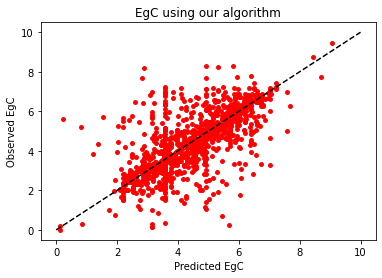

In [127]:
plt.scatter(predictions1,y_test,c="r",s=15)
plt.plot([0,10],[0,10],"k--")
plt.xlabel('Predicted EgC')
plt.ylabel('Observed EgC')
plt.title("EgC using our algorithm");

### Decision Tree

In [135]:
from sklearn.tree import DecisionTreeRegressor
  
regressor1 =DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

regressor1.fit(X_train, y_train) 


predictions1 = regressor1.predict(X_test)
predictions_train = regressor1.predict(X_train)


result1 = X_test
result1['value'] = y_test
result1['prediction'] = predictions1.tolist()
result1.head()

,0,1,2,3,4,5,6,7,8,9,...,1016,1017,1018,1019,1020,1021,1022,1023,value,prediction
402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,6.066600
321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.038600
457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,6.238000
879,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.986291
1536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.8804,3.581300


In [136]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, predictions1))
print('RMSE of crystallisation Tendency:', rmse)

RMSE of crystallisation Tendency: 1.1855863573462893


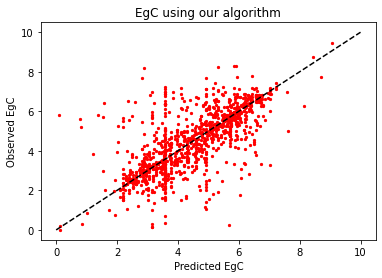

In [137]:
plt.scatter(predictions1,y_test,c="r",s=5)
plt.plot([0,10], [0,10] ,"k--")
plt.xlabel('Predicted EgC')
plt.ylabel('Observed EgC')
plt.title("EgC using our algorithm");

### Ablation study

### Random Forest

In [131]:

from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

n_estimators = [10,200] # number of trees in the random forest
# max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 200, num = 2)] # maximum number of levels allowed in each decision tree
# min_samples_split = [2, 6, 10] # minimum sample number to split a node
# min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
# bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators, 
#                'max_features': max_features,

'max_depth': max_depth}

# 'min_samples_split': min_samples_split,

# 'min_samples_leaf': min_samples_leaf,

# 'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

rf_random.fit(x, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 200],
                                        'n_estimators': [10, 200]},
                   random_state=35, verbose=2)

In [132]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [10, 200], 'max_depth': [10, 200]} 

Best Parameters:  {'n_estimators': 200, 'max_depth': 200}  



In [133]:
regressor2 = RandomForestRegressor(n_estimators =200, max_depth =200)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

regressor2.fit(X_train, y_train) 


predictions2 = regressor2.predict(X_test)

R2 =r2_score(y_test, predictions2)

print('R^2 of crystallisation tendency after tuning:', R2)

Rmse = np.sqrt(mean_squared_error(y_test, predictions2))
print('MSE of Crysatllisation Tendency after tuning:', Rmse)

R^2 of crystallisation tendency after tuning: 0.5635005738535066
MSE of Crysatllisation Tendency after tuning: 1.0497997145975422


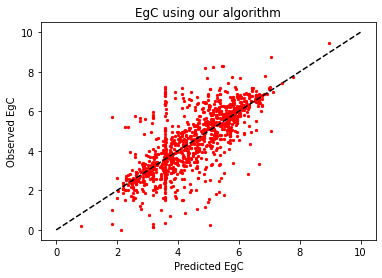

In [134]:
plt.scatter(predictions2,y_test,c="r",s=5)
plt.plot([0,10], [0,10] ,"k--")
plt.xlabel('Predicted EgC')
plt.ylabel('Observed EgC')
plt.title("EgC using our algorithm");

### Decision Tree

In [138]:
dt = DecisionTreeRegressor()

min_samples_split = [2,3,5, 8, 10] # number of trees in the random forest
# max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(20, 700, num = 4)] # maximum number of levels allowed in each decision tree
# min_samples_split = [2, 6, 10] # minimum sample number to split a node
# min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
# bootstrap = [True, False] # method used to sample data points

random_grid = {'min_samples_split': min_samples_split, 
#                'max_features': max_features,

'max_depth': max_depth}


dt_random = RandomizedSearchCV(estimator = dt,param_distributions = random_grid,
               n_iter = 200, cv = 3, verbose=2, random_state=42, n_jobs = -1)

dt_random.fit(x, y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': [20, 246, 473, 700],
                                        'min_samples_split': [2, 3, 5, 8, 10]},
                   random_state=42, verbose=2)

In [139]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', dt_random.best_params_, ' \n')

Random grid:  {'min_samples_split': [2, 3, 5, 8, 10], 'max_depth': [20, 246, 473, 700]} 

Best Parameters:  {'min_samples_split': 8, 'max_depth': 20}  



In [141]:
regressor2 = DecisionTreeRegressor(min_samples_split = 8, max_depth= 20)

X_train1, X_test1, y_train1, y_test1 = train_test_split(x,y,test_size=0.33, random_state=42)
  
regressor2.fit(X_train1, y_train1) 


predictions2 = regressor2.predict(X_test1)

Rmse = np.sqrt(mean_squared_error(y_test1, predictions2))
print('MSE of Crystallisation Tendency after tuning for decsion tree:', Rmse)

MSE of Crystallisation Tendency after tuning for decsion tree: 1.1755579374062182


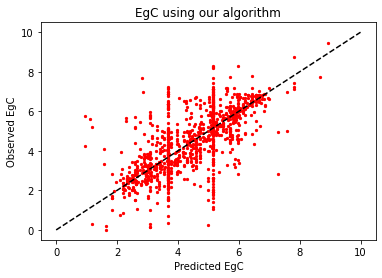

In [142]:
plt.scatter(predictions2,y_test1,c="r",s=5)
plt.plot([0,10], [0,10] ,"k--")
plt.xlabel('Predicted EgC')
plt.ylabel('Observed EgC')
plt.title("EgC using our algorithm");

# Mordred Fingerprint

In [142]:
# pip install mordred

Note: you may need to restart the kernel to use updated packages.


In [74]:
from mordred import Calculator, descriptors
def morgan_fpts(data):
    Morgan_fpts = []
    for i in data:
        mol = Chem.MolFromSmiles(i) 
        fpts =  AllChem.GetMorganFingerprintAsBitVect(mol,2,2048)
        mfpts = np.array(fpts)
        Morgan_fpts.append(mfpts)  
    return np.array(Morgan_fpts)

In [75]:
Morgan_fpts = morgan_fpts(df['smiles'])

In [76]:
Morgan_fingerprints = pd.DataFrame(Morgan_fpts,columns=['Col_{}'.format(i) for i in range(Morgan_fpts.shape[1])])
Morgan_fingerprints

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
def All_Mordred_descriptors(data):
    calc = Calculator(descriptors, ignore_3D=False)
    mols = [Chem.MolFromSmiles(smi) for smi in data]
    
    # pandas df
    df = calc.pandas(mols)
    return df


In [78]:
mordred_descriptors = All_Mordred_descriptors(df['smiles'])

  8%|█████▉                                                                         | 470/6265 [00:22<04:35, 21.07it/s]

C:\Users\SAROJ SATHISH\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 11%|████████▎                                                                      | 662/6265 [00:30<08:38, 10.80it/s]

C:\Users\SAROJ SATHISH\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\SAROJ SATHISH\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\SAROJ SATHISH\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 11%|████████▌                                                                      | 677/6265 [00:33<19:41,  4.73it/s]

C:\Users\SAROJ SATHISH\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\SAROJ SATHISH\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 11%|████████▊                                                                      | 703/6265 [00:34<08:34, 10.82it/s]

C:\Users\SAROJ SATHISH\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\SAROJ SATHISH\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████████████████████████████████████████████████████████████████████████| 6265/6265 [05:04<00:00, 20.61it/s]


In [79]:
mordred_descriptors

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,42.046950,3.822450,18,2,16.0,14.0,3.361111,1.333333
1,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,46.021878,5.752735,18,2,16.0,14.0,3.361111,1.333333
2,4.012290,4.284816,0,0,5.818626,2.074313,4.148627,5.818626,0.969771,2.626363,...,7.989899,31.665095,64.012457,8.001557,28,3,24.0,22.0,4.312500,1.375000
3,4.876567,5.209852,0,0,6.602720,2.175328,4.350655,6.602720,0.943246,2.792781,...,8.466531,34.219913,82.003035,10.250379,42,6,30.0,30.0,5.173611,1.500000
4,7.063820,7.558525,0,0,9.907543,2.343259,4.686518,9.907543,0.990754,3.162641,...,9.223158,39.914584,128.024913,9.144637,115,13,46.0,50.0,6.625000,2.187500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,14.142228,13.273201,0,0,21.307960,2.474677,4.876137,21.307960,1.183776,3.827745,...,9.973433,67.244773,263.969055,11.998593,601,27,98.0,116.0,8.069444,3.673611
6261,7.818707,8.481783,0,0,11.420199,2.393403,4.786805,11.420199,1.038200,3.263704,...,9.447071,41.712231,143.983442,13.089404,144,17,52.0,59.0,7.486111,2.395833
6262,11.435146,11.493514,0,0,16.837003,2.449034,4.855714,16.837003,1.122467,3.618692,...,9.755625,61.091398,209.976249,12.351544,343,22,78.0,90.0,8.208333,3.083333
6263,12.142253,11.497525,0,0,18.104933,2.435203,4.870405,18.104933,1.131558,3.675879,...,9.817548,48.797213,204.019828,10.200991,420,25,82.0,94.0,8.458333,3.333333


In [143]:
y2 = df.iloc[824:4203,:].value
x2= mordred_descriptors.iloc[824:4203,:50]
x2 = x2.dropna(axis=1)

In [144]:
x2

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,ATS5dv,ATS6dv,ATS7dv,ATS8dv,ATS0d,ATS1d,ATS2d,ATS3d,ATS4d,ATS5d
824,3.644924,4.097495,0,0,6.898979,1.931852,3.863703,6.898979,1.149830,2.595800,...,0.000000,0.000000,0.0,0.0,28.0,33.0,46.0,39.0,21.0,9.0
825,4.352030,4.798324,0,0,7.878462,1.969616,3.939231,7.878462,1.125495,2.752840,...,0.000000,0.000000,0.0,0.0,34.0,41.0,60.0,55.0,39.0,21.0
826,5.277917,5.655215,0,0,8.565187,2.042079,4.084158,8.565187,1.070648,2.899769,...,0.000000,0.000000,0.0,0.0,42.0,49.0,80.0,71.0,66.0,33.0
827,5.766244,5.909452,0,0,9.910095,2.224503,4.194610,9.910095,1.238762,2.984531,...,0.000000,0.000000,0.0,0.0,46.0,61.0,99.0,92.0,51.0,12.0
828,9.301778,8.355849,0,0,16.400274,2.165325,4.330650,16.400274,1.261560,3.436880,...,30.000000,24.000000,14.0,4.0,76.0,101.0,163.0,186.0,161.0,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4198,12.108302,11.067651,0,2,18.505186,2.220646,4.441292,18.505186,1.088540,3.677525,...,52.000000,40.000000,28.0,20.0,104.0,122.0,219.0,230.0,254.0,214.0
4199,15.643836,13.045134,0,2,25.144781,2.199740,4.399481,25.144781,1.142945,3.930772,...,68.000000,64.000000,64.0,60.0,134.0,162.0,284.0,310.0,330.0,296.0
4200,21.300690,15.704674,0,2,35.371127,2.199784,4.399568,35.371127,1.179038,4.236755,...,100.000000,96.000000,96.0,92.0,182.0,226.0,388.0,438.0,458.0,424.0
4201,13.586724,12.816858,0,0,20.109195,2.458020,4.916040,20.109195,1.117178,3.790014,...,55.530864,11.666667,9.0,0.0,114.0,131.0,239.0,255.0,289.0,240.0


### Random Forest

In [145]:
regressor1 =DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.33, random_state=42)

regressor1.fit(X_train, y_train) 


predictions1 = regressor1.predict(X_test)
predictions_train = regressor1.predict(X_train)


result1 = X_test
result1['value'] = y_test
result1['prediction'] = predictions1.tolist()
result1.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,ATS7dv,ATS8dv,ATS0d,ATS1d,ATS2d,ATS3d,ATS4d,ATS5d,value,prediction
1226,10.825381,9.875800,0,0,19.022658,2.077116,4.154232,19.022658,1.188916,3.595015,...,72.000000,64.0,74.0,86.0,115.0,109.0,103.0,98.0,5.9381,5.9663
1145,38.079025,23.417151,0,0,64.167697,2.495241,4.990483,64.167697,1.365270,4.806596,...,881.000000,834.0,286.0,362.0,549.0,630.0,600.0,610.0,2.9354,3.1231
1281,13.653808,11.410586,0,0,24.479745,2.048354,4.096709,24.479745,1.223987,3.818472,...,78.666667,56.0,96.0,114.0,155.0,163.0,150.0,141.0,5.2808,5.1928
1703,14.539255,11.879617,0,0,24.420034,2.265339,4.530677,24.420034,1.221002,3.860182,...,100.000000,100.0,105.0,127.0,179.0,198.0,174.0,154.0,4.7860,4.5298
2360,16.223016,12.058280,0,0,28.821538,2.330444,4.660888,28.821538,1.310070,3.981095,...,188.000000,152.0,114.0,137.0,191.0,204.0,180.0,163.0,4.0246,4.1401


R^2 of Crystallisation Tendency: 0.5859079949473539
MSE of Crystallisation Tendency: 1.1821315741426812


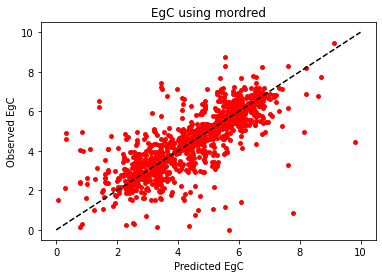

In [146]:
R2 =r2_score(y_test,predictions1)
print('R^2 of Crystallisation Tendency:', R2)

Rmse = np.sqrt(mean_squared_error(y_test, predictions1))
print('MSE of Crystallisation Tendency:', mse)

plt.scatter(predictions1,y_test,c="r",s=15)
plt.plot([0,10], [0,10] ,"k--")
plt.savefig('EgC_mordred_RF.png')
plt.xlabel('Predicted EgC')
plt.ylabel('Observed EgC')
plt.title("EgC using mordred");

### Decision Tree

In [147]:
from sklearn.tree import DecisionTreeRegressor
  
regressor1 =DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.33, random_state=42)

regressor1.fit(X_train, y_train) 


predictions1 = regressor1.predict(X_test)
predictions_train = regressor1.predict(X_train)


result1 = X_test
result1['value'] = y_test
result1['prediction'] = predictions1.tolist()
result1.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,ATS7dv,ATS8dv,ATS0d,ATS1d,ATS2d,ATS3d,ATS4d,ATS5d,value,prediction
1226,10.825381,9.875800,0,0,19.022658,2.077116,4.154232,19.022658,1.188916,3.595015,...,72.000000,64.0,74.0,86.0,115.0,109.0,103.0,98.0,5.9381,5.9663
1145,38.079025,23.417151,0,0,64.167697,2.495241,4.990483,64.167697,1.365270,4.806596,...,881.000000,834.0,286.0,362.0,549.0,630.0,600.0,610.0,2.9354,3.1231
1281,13.653808,11.410586,0,0,24.479745,2.048354,4.096709,24.479745,1.223987,3.818472,...,78.666667,56.0,96.0,114.0,155.0,163.0,150.0,141.0,5.2808,5.1396
1703,14.539255,11.879617,0,0,24.420034,2.265339,4.530677,24.420034,1.221002,3.860182,...,100.000000,100.0,105.0,127.0,179.0,198.0,174.0,154.0,4.7860,4.5424
2360,16.223016,12.058280,0,0,28.821538,2.330444,4.660888,28.821538,1.310070,3.981095,...,188.000000,152.0,114.0,137.0,191.0,204.0,180.0,163.0,4.0246,4.1401


In [148]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, predictions1))
print('RMSE of crystallisation Tendency using mordred and decision Tree:', rmse)

RMSE of crystallisation Tendency using mordred and decision Tree: 1.0326390707932147


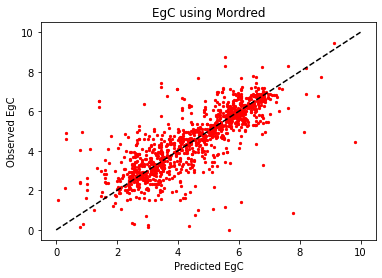

In [149]:
plt.scatter(predictions1,y_test,c="r",s=5)
plt.plot([0,10], [0,10] ,"k--")
plt.xlabel('Predicted EgC')
plt.ylabel('Observed EgC')
plt.title("EgC using Mordred");

## Ablation Studies

### Random Forest

In [150]:

from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

n_estimators = [5,200] # number of trees in the random forest
# max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 50, num = 2)] # maximum number of levels allowed in each decision tree
# min_samples_split = [2, 6, 10] # minimum sample number to split a node
# min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
# bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators, 
#                'max_features': max_features,

'max_depth': max_depth}

# 'min_samples_split': min_samples_split,

# 'min_samples_leaf': min_samples_leaf,

# 'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 3, verbose=2, random_state=35, n_jobs = -1)

rf_random.fit(x2, y2)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 50],
                                        'n_estimators': [5, 200]},
                   random_state=35, verbose=2)

In [151]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 200], 'max_depth': [10, 50]} 

Best Parameters:  {'n_estimators': 200, 'max_depth': 50}  



In [158]:
regressor2 = RandomForestRegressor(n_estimators= 200, max_depth= 50)

X_train1, X_test1, y_train1, y_test1 = train_test_split(x2,y2,test_size=0.33, random_state = 42)
  
regressor2.fit(X_train1, y_train1) 


predictions2 = regressor2.predict(X_test1)

Rmse = np.sqrt(mean_squared_error(y_test1, predictions2))
print('MSE of Crystallisation tendency after tuning:', Rmse)

MSE of Crystallisation tendency after tuning: 0.7632859539175548


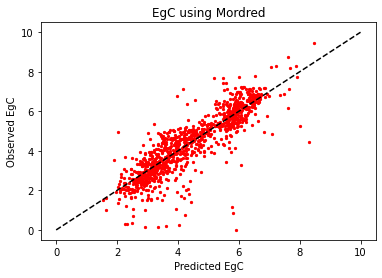

In [159]:
plt.scatter(predictions2,y_test1,c="r",s=5)
plt.plot([0,10], [0,10] ,"k--")
plt.xlabel('Predicted EgC')
plt.ylabel('Observed EgC')
plt.title("EgC using Mordred");

### Decision Tree

In [154]:
dt = DecisionTreeRegressor()

min_samples_split = [3,5, 8] # number of trees in the random forest
# max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 150, num = 3)] # maximum number of levels allowed in each decision tree
# min_samples_split = [2, 6, 10] # minimum sample number to split a node
# min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
# bootstrap = [True, False] # method used to sample data points

random_grid = {'min_samples_split': min_samples_split, 
#                'max_features': max_features,

'max_depth': max_depth}

# 'min_samples_split': min_samples_split,

# 'min_samples_leaf': min_samples_leaf,

# 'bootstrap': bootstrap}

dt_random = RandomizedSearchCV(estimator = dt,param_distributions = random_grid,
               n_iter = 200, cv = 3, verbose=2, random_state=42, n_jobs = -1)

dt_random.fit(x2, y2)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 80, 150],
                                        'min_samples_split': [3, 5, 8]},
                   random_state=42, verbose=2)

In [155]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', dt_random.best_params_, ' \n')

Random grid:  {'min_samples_split': [3, 5, 8], 'max_depth': [10, 80, 150]} 

Best Parameters:  {'min_samples_split': 5, 'max_depth': 10}  



In [156]:
regressor2 = DecisionTreeRegressor(min_samples_split = 5, max_depth= 10)

X_train1, X_test1, y_train1, y_test1 = train_test_split(x2,y2,test_size=0.33, random_state=42)
  
regressor2.fit(X_train1, y_train1) 


predictions2 = regressor2.predict(X_test1)

Rmse = np.sqrt(mean_squared_error(y_test1, predictions2))
print('MSE of Crystallisation Tendency after tuning for decsion tree:', Rmse)

MSE of Crystallisation Tendency after tuning for decsion tree: 0.9403649673677822


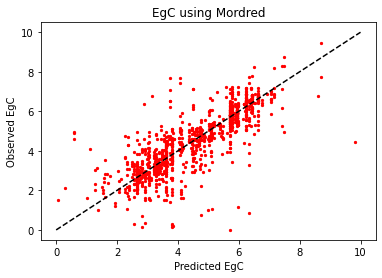

In [157]:
plt.scatter(predictions2,y_test1,c="r",s=5)
plt.plot([0,10], [0,10] ,"k--")
plt.xlabel('Predicted EgC')
plt.ylabel('Observed EgC')
plt.title("EgC using Mordred");